# Leaner Regression
#### Understand leaner line 

y = mx+b

m - slope
b - start point y

#### Cost Fn
There two types 
1.  MAE - Mean Absolute Error; 
2.  MSE - Mean Squared Error. 

Here we use **MSE** to magnify outter error to large weight

#### Checkout - derivatives from differentition
+ https://www.youtube.com/watch?v=ktOYbZ8CpLA&list=PLybg94GvOJ9ELZEe9s2NXTKr41Yedbw7M&index=2
+ https://www.youtube.com/watch?v=J27BZCX1OF8&list=PLybg94GvOJ9ELZEe9s2NXTKr41Yedbw7M&index=3


#### Checkout - Gradient
+ Derivatives power rule - https://www.youtube.com/watch?v=x3iEEDxrhyE
+ Derivatives Chain rule - https://www.youtube.com/watch?v=_x1nCg2LfuA&list=PLybg94GvOJ9ELZEe9s2NXTKr41Yedbw7M
+ Partical derivatives - https://www.youtube.com/watch?v=AXH9Xm6Rbfc

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

aX,ay = make_regression(n_samples=100, n_features=1, noise=20, random_state=4)

(array([[<Axes: title={'center': 'f1'}>,
         <Axes: title={'center': 'target'}>]], dtype=object),
                f1      target
 count  100.000000  100.000000
 mean     0.035274    2.211021
 std      0.977815   75.244575
 min     -2.379775 -181.348400
 25%     -0.647660  -44.501680
 50%      0.052497    3.122157
 75%      0.603599   47.541851
 max      2.476584  176.928314)

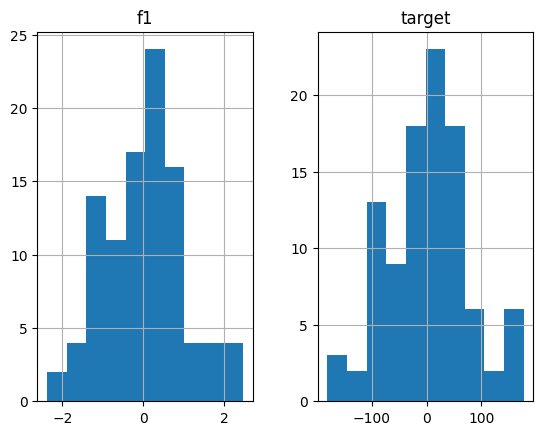

In [2]:
df = pd.DataFrame({})
df['f1'] = aX[:, 0]
df['target'] = ay
df.hist(), df.describe()

Text(0, 0.5, 'target')

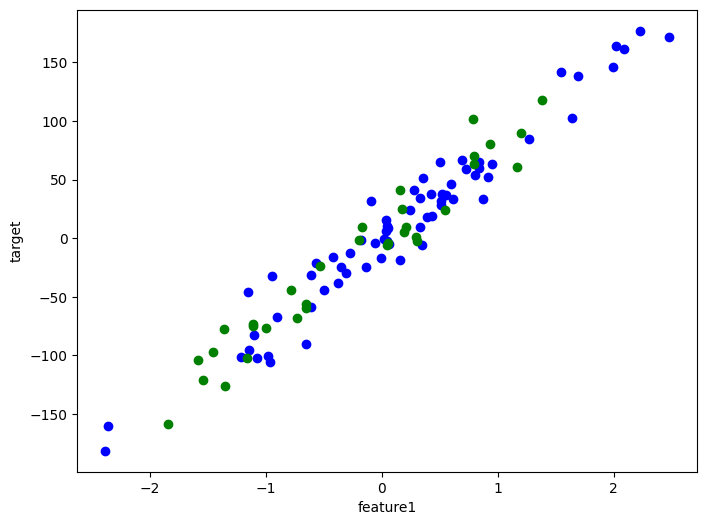

In [3]:
X, X_test, y, y_test = train_test_split(aX, ay, test_size=0.33, random_state=42)
fig = plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], y, c='b', marker = "o")
plt.scatter(X_test[:, 0], y_test, c='g', marker = "o")
plt.xlabel('feature1')
plt.ylabel('target')

In [4]:
y

array([  10.77367111,   24.2973507 ,   -2.75191769,  -17.17634894,
          8.3784894 ,   33.21708479,  141.46769811,  -24.27446551,
        -16.2068899 ,   53.81362958,   34.44108322,  163.94385144,
        -32.59583109,  -58.51318402,  -31.77399504,  -21.4183161 ,
         31.80766772, -181.34840044,    6.05472009,  -24.36756973,
       -105.56283971,  -95.34105851,   19.1701073 ,   58.70355923,
         59.88451573,  -45.61698488,   -4.63168152,   64.53968736,
         33.43401768,   52.1696979 ,   -3.80893607,  -90.60148118,
       -160.50895428,   -1.15989334, -100.73717846,  -82.91713341,
        160.99602125,  102.48327018,  146.10300439,   66.43434451,
         15.74278405,   40.69772522,   84.52102913,    9.55981705,
        138.19938797,   31.43120085,   36.86598297,   -5.54348338,
       -102.36728191,   -1.77758908,   37.35891532,   50.92876904,
       -101.79001521,  -37.87145989,   63.15463302,   46.41287784,
        -44.1299115 ,  -67.2815873 ,  176.92831393,   64.66264

In [5]:

n_record, n_features = X.shape

# learning rate
lr =0.01
iter = 350

#Let number of weight for features 
W = np.zeros(n_features)
b = 0

# predict Y 

for _ in range(iter):
    Y = np.dot(W,X.T)+b 
    dW = (2/n_record) * np.dot((Y-y),X) 
    db = (2/n_record) * np.sum(Y-y)
    W = W - lr*dW
    b = b - lr*db

W, b

(array([74.59759426]), -0.9980300377532586)

In [6]:
# let predect result with training set 
Y = np.dot(W,X_test.T)+b 

mse = np.mean((y_test-Y)**2)

# 1000 - 289.3351257269008
# 500 - 289.3082220994243
# 300 - 288.9286150959084
#250 - 289.1263619543994
# 200 - 292.2672302581156
# 100 - 432.157132733399
mse

289.0871792009004

Text(0, 0.5, 'target')

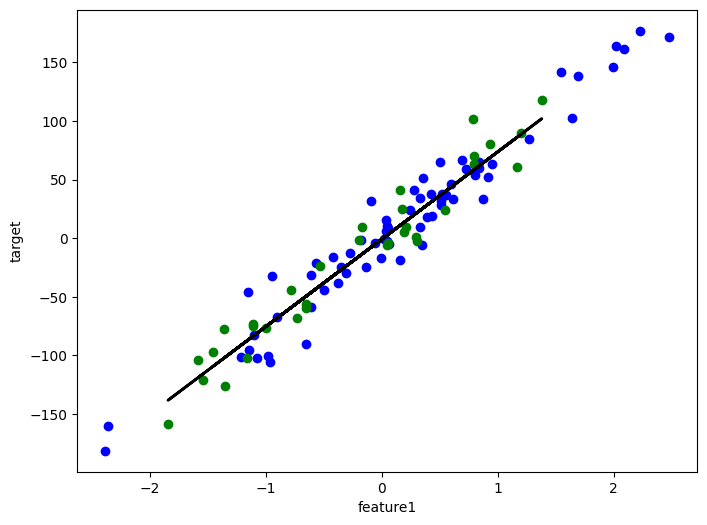

In [7]:
fig = plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], y, c='b', marker = "o")
plt.scatter(X_test[:, 0], y_test, c='g', marker = "o")
plt.plot(X_test, Y, color='black', linewidth=2, label='Prediction')
plt.xlabel('feature1')
plt.ylabel('target')